In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import elo
from copy import deepcopy
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import ratings_scraper

In [2]:
SAMPLE_NUM = 10000

Hacky - adding numbers < 1 to teams with big goal difference advantage

In [3]:
standings = {
    'Man City':86.5,
    'Liverpool':88,
    'Tottenham':67.7,
    'Arsenal': 66.3,
    'Chelsea': 66,
    'Man United':64,
    'Leicester':48,
    'Wolves':48,
    'Everton':49,
    'Watford':49,
    'West Ham':43,
    'Bournemouth':41,
    'Crystal Palace':39,
    'Burnley':39,
    'Newcastle':41,
    'Southampton':36,
    'Brighton':34,
    'Cardiff':31,
    'Fulham':23,
    'Huddersfield':14,   
}

Only run if you want to update ratings - needs internet connection!

In [5]:
ratings_scraper.update_ratings()

Done!


In [6]:
ratings_df = pd.read_csv('data/ratings_latest.csv')

In [7]:
prem_clubs = ['Man City',
 'Liverpool',
 'Tottenham',
 'Arsenal',
 'Chelsea',
 'Man United',
 'Leicester',
 'Wolves',
 'Everton',
 'Watford',
 'West Ham',
 'Bournemouth',
 'Crystal Palace',
 'Burnley',
 'Newcastle',
 'Southampton',
 'Brighton',
 'Cardiff',
 'Fulham',
 'Huddersfield']

In [8]:
prem_clubs

['Man City',
 'Liverpool',
 'Tottenham',
 'Arsenal',
 'Chelsea',
 'Man United',
 'Leicester',
 'Wolves',
 'Everton',
 'Watford',
 'West Ham',
 'Bournemouth',
 'Crystal Palace',
 'Burnley',
 'Newcastle',
 'Southampton',
 'Brighton',
 'Cardiff',
 'Fulham',
 'Huddersfield']

In [9]:
ratings = ratings_scraper.filter_ratings(ratings_df, prem_clubs)

In [10]:
fixtures = [
    ['Chelsea','Burnley'],
    ['Watford','Southampton'],
    ['Tottenham','Brighton'],
    ['Wolves','Arsenal'],
    ['Man United','Man City'],
    ['Liverpool','Huddersfield'],
    ['Tottenham','West Ham'],
    ['Southampton','Bournemouth'],
    ['Fulham','Cardiff'],
    ['Watford','Wolves'],
    ['Crystal Palace','Everton'],
    ['Brighton','Newcastle'],
    ['Burnley','Man City'],
    ['Man United','Chelsea'],
    ['Leicester','Arsenal'],
    ['Everton','Burnley'],
    ['Man City','Leicester'],
    ['West Ham','Southampton'],
    ['Wolves','Fulham'],
    ['Chelsea','Watford'],
    ['Arsenal','Brighton'],
    ['Cardiff','Crystal Palace'],
    ['Huddersfield','Man United'],
    ['Newcastle','Liverpool'],
    ['Bournemouth','Tottenham'],
    ['Tottenham','Everton'],
    ['Man United','Cardiff'],
    ['Watford','West Ham'],
    ['Southampton','Huddersfield'],
    ['Leicester','Chelsea'],
    ['Fulham','Newcastle'],
    ['Liverpool','Wolves'],
    ['Crystal Palace','Bournemouth'],
    ['Brighton','Man City'],
    ['Burnley','Arsenal'],
]

In [11]:
l = elo.League(ratings=deepcopy(ratings),
          standings=deepcopy(standings),
          fixtures=deepcopy(fixtures),
              k_factor=15,
              draw_rate=0.4,
              home_advantage=0.1)

In [12]:
l.get_outcome_probs('Man United','Man City')

(0.3723894292691322,
 (0.27929207195184913, 0.1861947146345661, 0.5345132134135848))

In [13]:
points_totals, rankings = elo.sim_multiple_leagues(ratings, standings, fixtures, SAMPLE_NUM,
                                                  k_factor = 15, draw_rate = 0.4, home_advantage=0.1)

9000/10000


In [14]:
[f for f in fixtures if f[0] == 'Chelsea' or f[1] == 'Chelsea']

[['Chelsea', 'Burnley'],
 ['Man United', 'Chelsea'],
 ['Chelsea', 'Watford'],
 ['Leicester', 'Chelsea']]

In [15]:
[f for f in fixtures if f[0] == 'Man United' or f[1] == 'Man United']

[['Man United', 'Man City'],
 ['Man United', 'Chelsea'],
 ['Huddersfield', 'Man United'],
 ['Man United', 'Cardiff']]

In [16]:
[f for f in fixtures if f[0] == 'Tottenham' or f[1] == 'Tottenham']

[['Tottenham', 'Brighton'],
 ['Tottenham', 'West Ham'],
 ['Bournemouth', 'Tottenham'],
 ['Tottenham', 'Everton']]

In [17]:
rankings_df = pd.melt(pd.DataFrame(rankings)).rename(columns={'variable':'club',
                           'value':'position'})

In [18]:
title_race = rankings_df.loc[rankings_df.position == 1,'club'].value_counts()

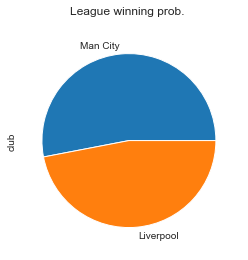

In [19]:
ax = title_race.plot.pie()
ax.set_title('League winning prob. \n')
plt.show()

In [20]:
top_4 = (rankings_df.loc[
    rankings_df.position < 5,'club'].value_counts() / SAMPLE_NUM)


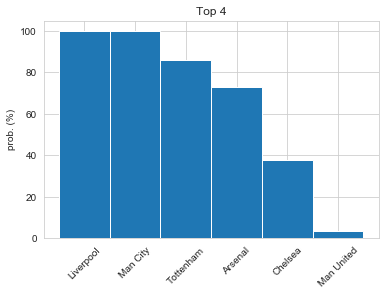

In [21]:
elo.plot_series(top_4.index,top_4 * 100,'Top 4')

In [22]:
religated = rankings_df.loc[rankings_df.position > 17,'club'].value_counts() / SAMPLE_NUM

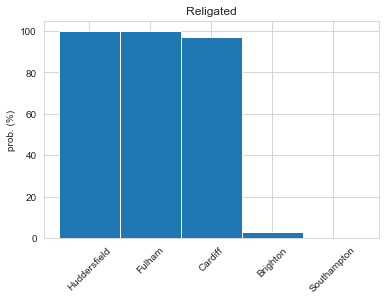

In [23]:
elo.plot_series(religated.index,religated * 100,'Religated')

In [24]:
points_df = pd.melt(pd.DataFrame(points_totals)).rename(columns={'variable':'club',
                           'value':'points'})

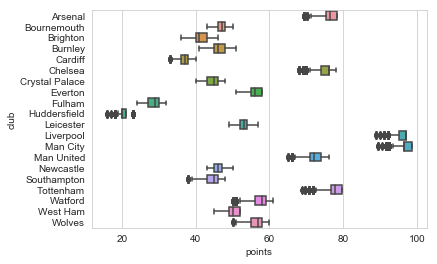

In [25]:
sns.boxplot(data=points_df,y='club',x='points')